In [2]:
import pandas as pd 

In [3]:
post_course = pd.read_csv('post_course.csv', index_col=0)

post_course.head()

,Student Number,Start Time,Submit Time,Status,Q1,Q2,Q2.1,Q2.2,Q2.3,Q3.1,...,Q4.10,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,Q7.5,Q8,Q9
0,1,2022-09-21 10:47:33.463,2022-09-21 10:49:18.587,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",No answer,No answer,No answer,Agree,...,True but I am not sure,the measure of the difference in potential,the measure of differencei n voltage,Agree,Agree,Agree,Agree,Agree,nil,nil
1,2,2022-09-21 14:45:01.423,2022-09-21 14:53:49.160,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",in Chemistry teaching labs,No answer,Others,Agree,...,False but I am not sure,Analytical tool used to measure the activity o...,An analytical tool to measure the activity of ...,Agree,Agree,Neutral,Strongly Disagree,Disagree,The project was difficult to carry and quite t...,Thank you prof. Sellou for your fun class and ...
2,3,2022-09-23 21:25:41.343,2022-09-23 21:34:24.110,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",No answer,No answer,No answer,Agree,...,False but I am not sure,the reaction occurs due to differences in elec...,analytical quantification method based on the ...,Agree,Agree,Neutral,Neutral,Agree,Those are really fun experiments!,NIL
3,5,2022-09-21 13:55:39.683,2022-09-21 14:24:52.207,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",in Chemistry teaching labs,No answer,No answer,Agree,...,"True, I am confident",The measure of voltage between two half cell t...,It is the measurement of current when a forced...,Neutral,Disagree,Disagree,Disagree,Strongly Disagree,"Firstly, the instructions were not very clear ...",Please take note that the assessment of the pr...
4,6,2022-09-20 21:04:34.863,2022-09-20 21:18:33.347,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",in Chemistry teaching labs,No answer,No answer,Agree,...,"False, I am confident","Potentiometry, electrolytic cell without batte...",Voltammetry (Electrolysis with potential appli...,Agree,Agree,Strongly Disagree,Agree,Neutral,The hands-on tutorial and project were a good ...,nil


In [4]:
post_course_q7 = post_course.filter(regex='Q7')
post_course_q7.head(10)

,Q7.1,Q7.2,Q7.3,Q7.4,Q7.5
0,Agree,Agree,Agree,Agree,Agree
1,Agree,Agree,Neutral,Strongly Disagree,Disagree
2,Agree,Agree,Neutral,Neutral,Agree
3,Neutral,Disagree,Disagree,Disagree,Strongly Disagree
4,Agree,Agree,Strongly Disagree,Agree,Neutral
5,Agree,Disagree,Neutral,Strongly Disagree,Strongly Disagree
6,NaN,NaN,NaN,NaN,NaN
7,Agree,Strongly Disagree,Agree,Neutral,Strongly Agree
8,Disagree,Strongly Disagree,Disagree,Disagree,Strongly Disagree
9,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree


In [2]:
'''
if we want to map it to a numerical value

map_d = {
    "Strongly Agree": 5,
    "Agree": 4,
    "Neutral": 3,
    "Disagree": 2,
    "Strongly Disagree": 1
}

post_course_q7 = post_course_q7.applymap(lambda x: map_d[x] if x in map_d else x)
post_course_q7.dropna(inplace = True)

'''

'\nif we want to map it to a numerical value\n\nmap_d = {\n    "Strongly Agree": 5,\n    "Agree": 4,\n    "Neutral": 3,\n    "Disagree": 2,\n    "Strongly Disagree": 1\n}\n\npost_course_q7 = post_course_q7.applymap(lambda x: map_d[x] if x in map_d else x)\npost_course_q7.dropna(inplace = True)\n\n'

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

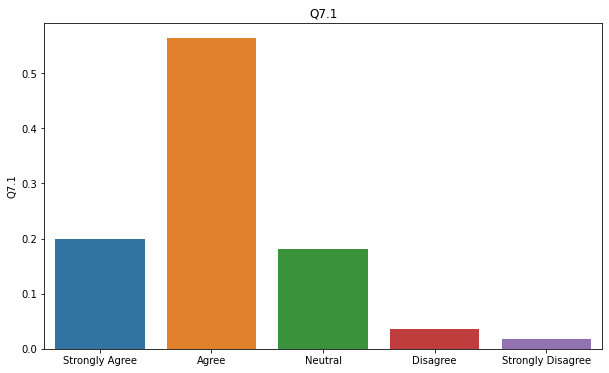

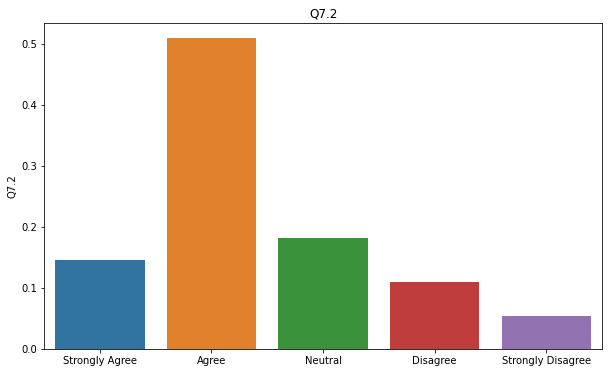

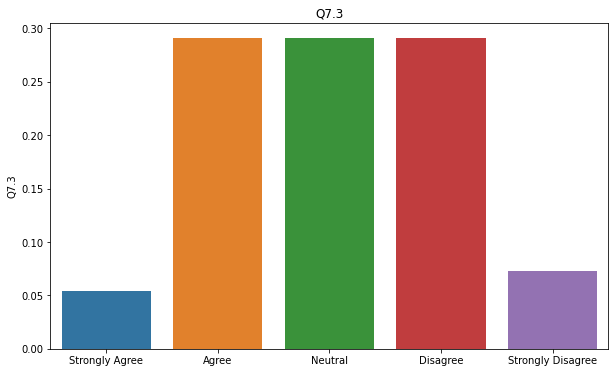

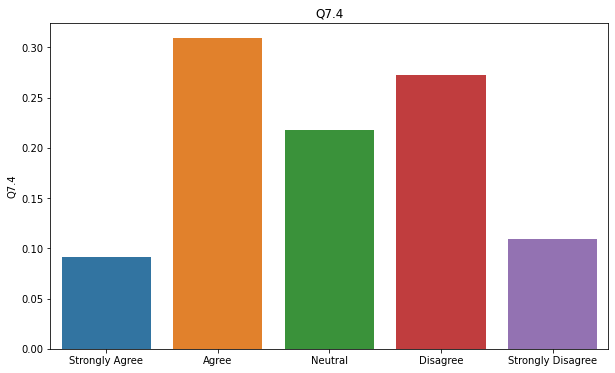

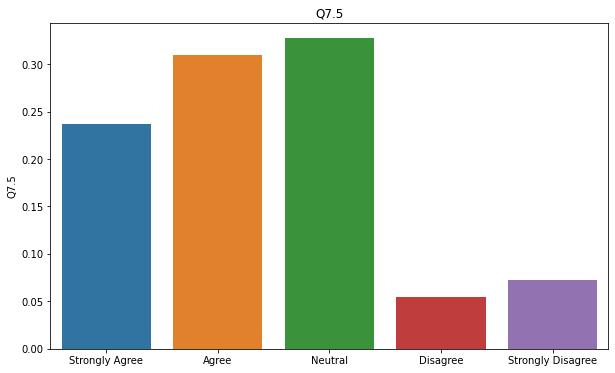

In [7]:
for col in post_course_q7.columns:
    plt.figure(figsize=(10,6))
    q7_value_counts = post_course_q7[col].value_counts(normalize = True)
    sns.barplot(x = q7_value_counts.index, y = q7_value_counts, order = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'])
    plt.title(col)
    plt.show()
    

In [13]:
post_course_q7["Q7.5"].value_counts(normalize=True)

Neutral              0.327273
Agree                0.309091
Strongly Agree       0.236364
Strongly Disagree    0.072727
Disagree             0.054545
Name: Q7.5, dtype: float64

- have to discuss each q
- have to talk about strong extremes / neutrals 

- have to decide on the bins (i.e. neutral with agree or its own category)
- analyse each question 

prof linda will explain:
- it's easy to carry out but difficult to understand

join 1 2 5 together --> electrochemistry in general
3 and 4 together --> project itself 

q3 q4 might have casual relationship --> people who find it hard to understand might find it hard to carry out 
--> statistical testing of the relationship itself